In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders1/*台苯*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders1\\2013台苯致股東.txt',
 './letterto shareholders1\\2014台苯致股東.txt',
 './letterto shareholders1\\2015台苯致股東.txt',
 './letterto shareholders1\\2016台苯致股東.txt',
 './letterto shareholders1\\2017台苯致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 3.192 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 股東 於 去 全球 好轉 率 優 於 前 使 全球 需求 亦 有 改善 率 優 於 全球 開 俥 率 亦 提高 至 是 中國大陸 需求 提高 至 最為 顯著 亞 洲 歲 修 集中 事故 頻傳 致使 價格 屢創 新高 本 以 策略 衝刺 業績 使 生產量 增加 而 銷售量 亦 銷售量 增加 致 營業額 亦 大幅 提升 了 在 本 全體 同仁 努力 下 是 產銷 數量 營業額 及 營業績 效等 前 年均 有 顯著 提升 本 營運績 效有 不錯 表現 營收及 獲利 顯著 合 併 營收 新 億 營業 毛利 新 億 毛利率 毛利 轉正數 營業 淨利新 億 佔營收 稅後淨 利為 新 億 稅後純益 率 增加 本 個 體營 新 億 佔合 併 營收 茲 就 營業概 況說 明如次 一 生產 本 生產 預算產量 之 二 銷售 本 銷售 銷售值 新 億 加計 副 後 銷售 總值 新 億 預算 銷售 總值 新 億 萬餘 元 之 三 獲利 能力 稅後淨 利為 新 億 預算 盈餘新 之 四 全 稅後純益 率 預算 純益率 之 五 研究 於 本 副 之 及 製 程 改善 之 研究 亦 投注 於 於 醫療 器材 之 低介電 薄膜 材料 新產品 展望 今 歐美國 可持續 復 甦 中國 控制 在 目標 下 相信 全球 將優 於 另 依據 預測 全球 需求 平均 開 俥 率 可達 均 優 於 顯示 景氣 仍 可 期待 本 氫氣 已 於 二月 銷 售 銷售量 提升 中 廠統 包 已 於 十二月 發包 預計個 完工 投產 另 積極 新產品 如 特用 對 二 乙基 苯 之 擴建 預計 完工 投產 除 現有 客戶 之外 亦 積極 擴大 全球 以 對 本 之 獲利 有所 挹注 嚴峻且 多變 情勢 本 在 營運 管理 上 憑 藉 多年 來 所累 積厚實 產 銷經驗 健全 管理 基礎 審慎 研訂 周全 且 具開源 節流 效果 之因 應方針 庚續 強化 經營 體質 除 積極進 行 製 程 改善 提升 製 程 效率 以 降低 生產 成本 外 第一套 生產 線 製 程 改善 已 完 成 可行性 評估 正 基本 設計 預估 明年 九月 完成 建造 納入 生產 另 中 裂解 汽油 提取 案 可行性 評估 以 提高 本 獲利 能力 及 競爭力 之 提升 並 密切 觀 察國內 外產業 動態 達到 產銷 最 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  673


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 673)


<5x673 sparse matrix of type '<class 'numpy.float64'>'
	with 1128 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
不錯 0.0568297097765873 0 15
中國 0.07043896045655426 0 21
之因 0.07043896045655426 0 27
之外 0.0568297097765873 0 28
之轉 0.07043896045655426 0 33
乙基 0.07043896045655426 0 37
九月 0.0568297097765873 0 38
事故 0.07043896045655426 0 41
低介電 0.0568297097765873 0 60
依據 0.07043896045655426 0 75
保留 0.0568297097765873 0 78
健全 0.09434758550463655 0 87
全球 0.2013872524341079 0 99
全體 0.07043896045655426 0 101
具開源 0.07043896045655426 0 110
利為 0.09434758550463655 0 117
創造 0.0793681632721172 0 123
努力 0.0568297097765873 0 131
動態 0.07043896045655426 0 132
務求 0.0568297097765873 0 133
十二月 0.07043896045655426 0 138
可持續 0.0568297097765873 0 148
可行性 0.14087792091310852 0 151
同仁 0.07043896045655426 0 157
周全 0.07043896045655426 0 161
嚴峻且 0.07043896045655426 0 167
基礎 0.07043896045655426 0 183
增加 0.10069362621705395 0 187
外產業 0.07043896045655426 0 189
多年 0.07043896045655426 0 193
多變 0.0568297097765873 0 196
完工 0.09434758550463655 0 210
密切 0.0568297097765873 0 215
察國內 0.07043896045655426 0 216
審慎 0.0704389

反彈 0.13754905619664753 2 145
反轉 0.09169937079776502 2 146
向上 0.09169937079776502 2 158
回升 0.07398247497344702 2 169
增加 0.08739048302815598 2 187
多餘 0.09169937079776502 2 197
大幅 0.10332365194282504 2 198
客戶 0.07749273895711878 2 214
展望 0.06554286227111698 2 231
年本 0.06141213733839597 2 253
成本 0.08739048302815598 2 275
提升 0.05166182597141252 2 300
擴建案 0.07398247497344702 2 310
收手 0.09169937079776502 2 314
改善 0.08739048302815598 2 315
數量 0.07749273895711878 2 331
既有 0.09169937079776502 2 342
景氣 0.05166182597141252 2 348
材料 0.07749273895711878 2 367
減少 0.05166182597141252 2 409
獲利 0.18081639089994384 2 436
環境 0.06141213733839597 2 447
生產 0.19662858681335094 2 449
生產線 0.06141213733839597 2 453
產量 0.06141213733839597 2 460
產銷 0.10332365194282504 2 461
目標 0.08739048302815598 2 475
稅後純益 0.05166182597141252 2 491
穩定 0.07749273895711878 2 496
第二 0.06141213733839597 2 502
策略 0.08739048302815598 2 504
經營 0.08739048302815598 2 519
總值 0.05166182597141252 2 526
翻轉 0.09169937079776502 2 533
觀望 0.09169

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders1\2013台苯致股東.txt,./letterto shareholders1\2014台苯致股東.txt,./letterto shareholders1\2015台苯致股東.txt,./letterto shareholders1\2016台苯致股東.txt,./letterto shareholders1\2017台苯致股東.txt
0,一波,0.000000,0.000000,0.045850,0.000000,0.000000
1,一路,0.000000,0.000000,0.045850,0.000000,0.000000
2,三月,0.000000,0.000000,0.045850,0.000000,0.000000
3,上升,0.000000,0.000000,0.000000,0.000000,0.072350
4,上游,0.000000,0.000000,0.045850,0.000000,0.000000
5,下旬,0.000000,0.000000,0.045850,0.000000,0.000000
6,下游,0.000000,0.000000,0.110974,0.000000,0.058371
7,下跌,0.000000,0.000000,0.091699,0.000000,0.000000
8,下降,0.000000,0.057488,0.036991,0.000000,0.000000
9,不如,0.000000,0.000000,0.045850,0.000000,0.000000


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders1\2013台苯致股東.txt,./letterto shareholders1\2014台苯致股東.txt,./letterto shareholders1\2015台苯致股東.txt,./letterto shareholders1\2016台苯致股東.txt,./letterto shareholders1\2017台苯致股東.txt
0,一波,0.000000,0.000000,0.045850,0.000000,0.000000
1,一路,0.000000,0.000000,0.045850,0.000000,0.000000
2,三月,0.000000,0.000000,0.045850,0.000000,0.000000
3,上升,0.000000,0.000000,0.000000,0.000000,0.072350
4,上游,0.000000,0.000000,0.045850,0.000000,0.000000
5,下旬,0.000000,0.000000,0.045850,0.000000,0.000000
6,下游,0.000000,0.000000,0.110974,0.000000,0.058371
7,下跌,0.000000,0.000000,0.091699,0.000000,0.000000
8,下降,0.000000,0.057488,0.036991,0.000000,0.000000
9,不如,0.000000,0.000000,0.045850,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07043896],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04584969, 0.04584969, 0.04584969, ..., 0.        , 0.03699124,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07234984, 0.0583714 ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一波,0,0,1,0,0
1,一路,0,0,1,0,0
2,三月,0,0,1,0,0
3,上升,0,0,0,0,1
4,上游,0,0,1,0,0
5,下旬,0,0,1,0,0
6,下游,0,0,3,0,1
7,下跌,0,0,2,0,0
8,下降,0,1,1,0,0
9,不如,0,0,1,0,0


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一波,0,0,1,0,0
1,一路,0,0,1,0,0
2,三月,0,0,1,0,0
3,上升,0,0,0,0,1
4,上游,0,0,1,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一波,0,0,1,0,0
1,一路,0,0,1,0,0
2,三月,0,0,1,0,0
3,上升,0,0,0,0,1
4,上游,0,0,1,0,0
5,下旬,0,0,1,0,0
6,下游,0,0,3,0,1
7,下跌,0,0,2,0,0
8,下降,0,1,1,0,0
9,不如,0,0,1,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一波': 1,
 '一路': 1,
 '三月': 1,
 '上升': 1,
 '上游': 1,
 '下旬': 1,
 '下游': 4,
 '下跌': 2,
 '下降': 2,
 '不如': 1,
 '不振': 1,
 '不淡': 2,
 '不確': 1,
 '不負': 3,
 '不足': 1,
 '不錯': 2,
 '並壓': 1,
 '並將': 2,
 '並尋求': 1,
 '並穩定': 1,
 '並能': 1,
 '中國': 1,
 '中國大陸': 16,
 '中華民國': 3,
 '主宰': 1,
 '主要用途': 2,
 '之前': 1,
 '之因': 1,
 '之外': 2,
 '之多項': 1,
 '之產銷': 2,
 '之粉': 1,
 '之負': 1,
 '之轉': 1,
 '之間': 1,
 '之際': 1,
 '之高點': 1,
 '乙基': 1,
 '九月': 2,
 '事件': 1,
 '事務性': 1,
 '事故': 1,
 '二月': 3,
 '五月': 3,
 '亦可': 1,
 '人力': 1,
 '仍持續': 1,
 '仍樂觀': 1,
 '仍約': 1,
 '仍能': 1,
 '以下': 1,
 '以不負': 1,
 '以實現': 2,
 '以持續': 1,
 '以期': 1,
 '以滿載': 1,
 '以謀取': 2,
 '以降': 1,
 '估中': 1,
 '估今': 1,
 '低介電': 2,
 '低價': 1,
 '低生產': 1,
 '低迷': 1,
 '低靡': 1,
 '佔合': 6,
 '佔營': 1,
 '佔營收': 3,
 '使未來': 1,
 '使本': 3,
 '使本公': 1,
 '使用量': 1,
 '供應': 1,
 '供給面': 1,
 '供需': 2,
 '依據': 1,
 '依據本': 2,
 '保有': 2,
 '保留': 2,
 '保護員工': 2,
 '修外': 1,
 '修天': 1,
 '修時間': 1,
 '修訂': 1,
 '俾為': 1,
 '值化產品': 2,
 '做好': 1,
 '健全': 4,
 '備貨': 1,
 '傳統': 1,
 '僅在': 1,
 '僅有': 1,
 '價值': 3,
 '價損': 1,
 '價格': 6,
 '優先': 1,
 '充滿': 

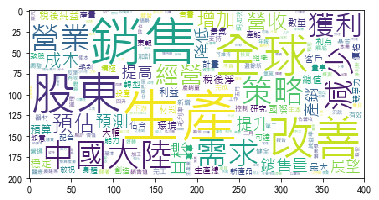

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [19]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('生產', 31),
 ('銷售', 27),
 ('全球', 20),
 ('改善', 19),
 ('股東', 18),
 ('中國大陸', 16),
 ('減少', 16),
 ('策略', 16),
 ('需求', 16),
 ('營業', 15),
 ('獲利', 15),
 ('經營', 15),
 ('預估', 15),
 ('營收', 14),
 ('增加', 13),
 ('成本', 12),
 ('目標', 12),
 ('提升', 11),
 ('預測', 11),
 ('提高', 10),
 ('銷售量', 10),
 ('降低', 10),
 ('展望', 9),
 ('產銷', 9),
 ('稅後淨', 9),
 ('穩定', 9),
 ('預算', 9),
 ('利益', 8),
 ('國際', 8),
 ('環境', 8)]

In [20]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xf9e4f60>,
 <a list of 10 Text xticklabel objects>)

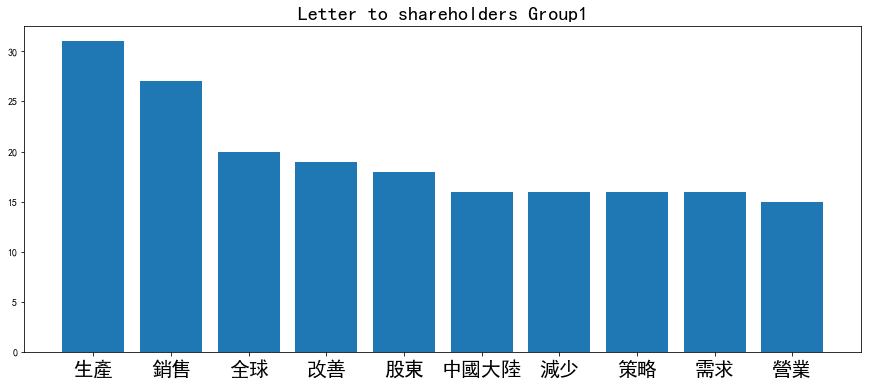

In [21]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group1",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 0.48830385, -0.2221272 ],
       [ 0.4987107 ,  0.2533117 ],
       [-0.31743491, -0.41013763],
       [-0.31029061, -0.24290552],
       [-0.35928903,  0.62185865]])

No handles with labels found to put in legend.


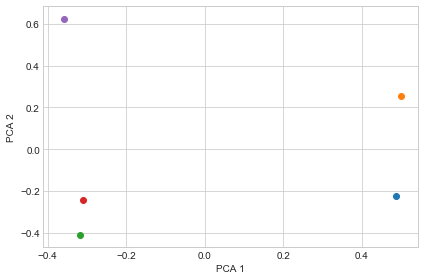

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

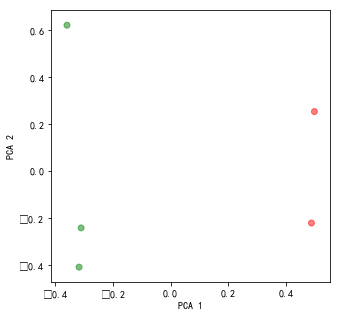

In [26]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (5,5))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()